# Conector MT5 - Python

#### Autor: Zann

In [2]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import datetime
import matplotlib.animation as animation

import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime

def get_closed_trades():
    # Conexión a MetaTrader 5
    if not mt5.initialize():
        print("Error al inicializar MetaTrader5:", mt5.last_error())
        return

    # Obtenemos el historial de operaciones cerradas en un rango de fechas
    from_date = datetime(2023, 1, 1)  # Cambia la fecha de inicio
    to_date = datetime.now()          # Hasta el momento actual
    deals = mt5.history_deals_get(from_date, to_date)

    if deals is None:
        print("No se encontraron operaciones cerradas:", mt5.last_error())
        mt5.shutdown()
        return

    # Procesamos los datos en un DataFrame
    trades = []
    for deal in deals:
        open_time = datetime.fromtimestamp(deal.time)  # Fecha y hora de apertura
        close_time = datetime.fromtimestamp(deal.time_msc / 1000)  # Fecha y hora de cierre
        duration = close_time - open_time  # Tiempo que estuvo abierta
        trades.append({
            "Ticket": deal.ticket,
            "Símbolo": deal.symbol,
            "Ganancia/Pérdida": deal.profit,
            "Tiempo abierto": duration,
            "Hora de apertura": open_time,
            "Hora de cierre": close_time
        })

    # Creamos un DataFrame para facilitar la visualización
    trades_df = pd.DataFrame(trades)
    mt5.shutdown()  # Cerramos conexión con MetaTrader5
    return trades_df


# Ejecutamos la función y mostramos las operaciones cerradas
closed_trades_df = get_closed_trades()
if closed_trades_df is not None:
    print(closed_trades_df)
    print("Total de operaciones cerradas:", len(closed_trades_df))

    


        Ticket               Símbolo  Ganancia/Pérdida         Tiempo abierto  \
0   8111396546                                10000.00 0 days 00:00:00.061000   
1   8127879399  Volatility 100 Index              0.00 0 days 00:00:00.142000   
2   8127879587  Volatility 100 Index             -0.09 0 days 00:00:00.124000   
3   8127984272  Volatility 100 Index              0.00 0 days 00:00:00.141000   
4   8128025257  Volatility 100 Index             16.41 0 days 00:00:00.148000   
5   8128944587      Crash 1000 Index              0.00 0 days 00:00:00.148000   
6   8129924376      Crash 1000 Index             14.99 0 days 00:00:00.214000   
7   8130739175  Volatility 100 Index              0.00 0 days 00:00:00.198000   
8   8130791842  Volatility 100 Index              0.00 0 days 00:00:00.199000   
9   8130797684  Volatility 100 Index              1.11 0 days 00:00:00.208000   
10  8130797690  Volatility 100 Index              3.61 0 days 00:00:00.203000   
11  8130856041      Crash 10

In [3]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime

def get_closed_trades():
    # Conexión a MetaTrader 5
    if not mt5.initialize():
        print("Error al inicializar MetaTrader5:", mt5.last_error())
        return

    # Obtenemos el historial de operaciones cerradas en un rango de fechas
    from_date = datetime(2023, 1, 1)  # Cambia la fecha de inicio
    to_date = datetime.now()          # Hasta el momento actual
    deals = mt5.history_deals_get(from_date, to_date)

    if deals is None:
        print("No se encontraron operaciones cerradas:", mt5.last_error())
        mt5.shutdown()
        return

    # Procesamos los datos en una lista para luego convertir a DataFrame
    trades = []
    for deal in deals:
        # Solo añadir si la ganancia/pérdida no es 0
        if deal.profit != 0:
            open_time = datetime.fromtimestamp(deal.time)  # Fecha y hora de apertura
            close_time = datetime.fromtimestamp(deal.time_msc / 1000)  # Fecha y hora de cierre
            duration = close_time - open_time  # Tiempo que estuvo abierta
            trades.append({
                "Ticket": deal.ticket,
                "Símbolo": deal.symbol,
                "Ganancia/Pérdida": deal.profit,
                "Tiempo abierto": str(duration),
                "Hora de apertura": open_time,
                "Hora de cierre": close_time
            })

    # Convertimos la lista en un DataFrame para mostrar ordenadamente
    trades_df = pd.DataFrame(trades)

    mt5.shutdown()  # Cerramos conexión con MetaTrader5

    # Imprimir DataFrame directamente como tabla en consola
    if not trades_df.empty:
        print(trades_df.to_string(index=False))  # Imprime sin índices
    else:
        print("No hay operaciones cerradas con ganancia/pérdida diferente de 0.")


# Ejecutamos la función para mostrar el resultado en consola
get_closed_trades()


    Ticket              Símbolo  Ganancia/Pérdida Tiempo abierto    Hora de apertura          Hora de cierre
8111396546                               10000.00 0:00:00.061000 2024-12-30 09:42:27 2024-12-30 09:42:27.061
8127879587 Volatility 100 Index             -0.09 0:00:00.124000 2025-01-18 11:13:30 2025-01-18 11:13:30.124
8128025257 Volatility 100 Index             16.41 0:00:00.148000 2025-01-18 14:40:38 2025-01-18 14:40:38.148
8129924376     Crash 1000 Index             14.99 0:00:00.214000 2025-01-20 22:15:48 2025-01-20 22:15:48.214
8130797684 Volatility 100 Index              1.11 0:00:00.208000 2025-01-21 22:35:18 2025-01-21 22:35:18.208
8130797690 Volatility 100 Index              3.61 0:00:00.203000 2025-01-21 22:35:20 2025-01-21 22:35:20.203
8130873028     Crash 1000 Index              4.68 0:00:00.216000 2025-01-22 01:12:33 2025-01-22 01:12:33.216
8132045372 Volatility 100 Index              3.17 0:00:00.199000 2025-01-23 08:29:30 2025-01-23 08:29:30.199
8132110634 Volatili

In [4]:
def get_open_trades():
    # Conexión a MetaTrader 5
    if not mt5.initialize():
        print("Error al inicializar MetaTrader5:", mt5.last_error())
        return

    # Obtenemos las operaciones abiertas
    orders = mt5.positions_get()

    if orders is None or len(orders) == 0:
        print("No hay operaciones abiertas:", mt5.last_error())
        mt5.shutdown()
        return

    # Procesamos los datos en un DataFrame
    open_trades = []
    for order in orders:
        open_trades.append({
            "Ticket": order.ticket,
            "Símbolo": order.symbol,
            "Ganancia/Pérdida Flotante": order.profit,
            "Precio de apertura": order.price_open,
            "Volumen": order.volume
        })

    open_trades_df = pd.DataFrame(open_trades)
    mt5.shutdown()  # Cerramos conexión con MetaTrader5
    return open_trades_df


# Ejecutamos la función y mostramos las operaciones abiertas
open_trades_df = get_open_trades()
if open_trades_df is not None:
    print(open_trades_df)


       Ticket               Símbolo  Ganancia/Pérdida Flotante  \
0  8225769941  Volatility 100 Index                     -48.21   

   Precio de apertura  Volumen  
0             1916.29      0.5  


In [9]:
import MetaTrader5 as mt5
import pandas as pd
import datetime

# Inicializar la conexión con MetaTrader 5
if not mt5.initialize():
    print("Error al inicializar MetaTrader 5")
    mt5.shutdown()
    exit()

# Definir el símbolo y el marco temporal
symbol = "Volatility 100 Index"  # Reemplaza con el símbolo deseado
timeframe = mt5.TIMEFRAME_H1  # Marco temporal de 1 minuto

# Definir el rango de fechas
utc_to = datetime.datetime.now()
utc_from = utc_to - datetime.timedelta(days=365*4 )  # Últimos 30 días

# Solicitar datos históricos
rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)
if rates is None or len(rates) == 0:
    print("No se pudieron obtener datos")
    mt5.shutdown()
    exit()

# Convertir los datos a un DataFrame de pandas
rates_frame = pd.DataFrame(rates)
rates_frame['time'] = pd.to_datetime(rates_frame['time'], unit='s')

# Guardar los datos en un archivo CSV
csv_file = f"{symbol.replace(' ', '_')}_H1.csv"
rates_frame.to_csv(csv_file, index=False)
print(f"Datos guardados en {csv_file}")

# Cerrar la conexión a MetaTrader 5
mt5.shutdown()


Datos guardados en Volatility_100_Index_H1.csv


True

In [2]:
import MetaTrader5 as mt5
import pandas as pd
import datetime

# Inicializar MetaTrader 5
if not mt5.initialize():
    print("Error al inicializar MetaTrader 5")
    mt5.shutdown()
    exit()

# Definir el símbolo y el marco temporal
symbol = "Volatility 100 Index"  # Reemplaza con el símbolo deseado
timeframe = mt5.TIMEFRAME_M1  # Marco temporal (1 minuto)

# Verificar si el símbolo está disponible
if not mt5.symbol_select(symbol):
    print(f"Símbolo {symbol} no encontrado")
    mt5.shutdown()
    exit()

# Definir la fecha inicial manualmente
utc_to = datetime.datetime.now()
utc_from = datetime.datetime(1970, 1, 1)  # Fecha inicial arbitraria (muy antigua)

# Descargar datos en bloques
all_data = []
block_size = datetime.timedelta(days=365)  # Bloques de un año
while utc_from < utc_to:
    next_from = utc_from + block_size
    if next_from > utc_to:
        next_from = utc_to

    # Descargar datos en el rango actual
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, next_from)
    if rates is not None and len(rates) > 0:
        all_data.extend(rates)
    else:
        print(f"No se obtuvieron datos para el rango {utc_from} a {next_from}")

    # Avanzar al siguiente bloque
    utc_from = next_from

# Convertir los datos descargados a un DataFrame
if len(all_data) > 0:
    rates_frame = pd.DataFrame(all_data)
    rates_frame['time'] = pd.to_datetime(rates_frame['time'], unit='s')

    # Guardar los datos en un archivo CSV
    csv_file = f"{symbol.replace(' ', '_')}_M1_full_data.csv"
    rates_frame.to_csv(csv_file, index=False)
    print(f"Datos guardados en {csv_file}")
else:
    print("No se descargaron datos históricos")

# Cerrar MetaTrader 5
mt5.shutdown()


SystemError: <built-in function copy_rates_range> returned a result with an error set

In [ ]:
import MetaTrader5 as mt5
import pandas as pd
import datetime

# Inicializar la conexión con MetaTrader 5
if not mt5.initialize():
    print("Error al inicializar MetaTrader 5")
    mt5.shutdown()
    exit()

# Definir el símbolo y el marco temporal
symbol = "Crash 500 Index"  # Reemplaza con el símbolo deseado
timeframe = mt5.TIMEFRAME_H1  # Marco temporal de 1 minuto

# Definir el rango de fechas
utc_to = datetime.datetime.now()
utc_from = utc_to - datetime.timedelta(days=365)  # Últimos 30 días

# Solicitar datos históricos
rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)
if rates is None or len(rates) == 0:
    print("No se pudieron obtener datos")
    mt5.shutdown()
    exit()

# Convertir los datos a un DataFrame de pandas
rates_frame = pd.DataFrame(rates)
rates_frame['time'] = pd.to_datetime(rates_frame['time'], unit='s')

# Guardar los datos en un archivo CSV
csv_file = f"{symbol.replace(' ', '_')}_H1.csv"
rates_frame.to_csv(csv_file, index=False)
print(f"Datos guardados en {csv_file}")

# Cerrar la conexión a MetaTrader 5
mt5.shutdown()

In [57]:
import os
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Show charts when running kernel
init_notebook_mode(connected=True)

# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

def plot_scatter(x, y, title):
    fig = go.Figure(go.Scatter(x=x, y=y, name=title))
    fig.update_layout(title_text=title)
    fig.show()

In [52]:
import pandas as pd
import mplfinance as mpf

# Cargar los datos desde el archivo CSV
file_path = 'Volatility_100_Index_M1.csv'  # Reemplaza con la ruta a tu archivo CSV
data = pd.read_csv(file_path)
data

,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-12-06 00:44:00,1197.94,1197.94,1196.09,1196.98,30,40,0
1,2024-12-06 00:45:00,1197.40,1199.42,1197.40,1198.56,30,40,0
2,2024-12-06 00:46:00,1198.67,1200.06,1197.91,1200.06,30,40,0
3,2024-12-06 00:47:00,1200.59,1201.65,1199.96,1201.01,29,40,0
4,2024-12-06 00:48:00,1201.04,1201.89,1199.92,1201.19,30,40,0
...,...,...,...,...,...,...,...,...
43192,2025-01-05 00:39:00,1480.45,1484.68,1480.39,1484.68,30,45,0
43193,2025-01-05 00:40:00,1485.08,1486.26,1481.34,1482.12,30,45,0
43194,2025-01-05 00:41:00,1481.96,1482.27,1479.53,1479.53,30,45,0
43195,2025-01-05 00:42:00,1479.36,1481.41,1479.36,1480.79,29,45,0


In [53]:
# Seleccionar las columnas necesarias para mplfinance
data = data[['time', 'open', 'high', 'low', 'close']]

# Renombrar las columnas
data.columns = ['Date','Open', 'High', 'Low', 'Close']
data

,Date,Open,High,Low,Close
0,2024-12-06 00:44:00,1197.94,1197.94,1196.09,1196.98
1,2024-12-06 00:45:00,1197.40,1199.42,1197.40,1198.56
2,2024-12-06 00:46:00,1198.67,1200.06,1197.91,1200.06
3,2024-12-06 00:47:00,1200.59,1201.65,1199.96,1201.01
4,2024-12-06 00:48:00,1201.04,1201.89,1199.92,1201.19
...,...,...,...,...,...
43192,2025-01-05 00:39:00,1480.45,1484.68,1480.39,1484.68
43193,2025-01-05 00:40:00,1485.08,1486.26,1481.34,1482.12
43194,2025-01-05 00:41:00,1481.96,1482.27,1479.53,1479.53
43195,2025-01-05 00:42:00,1479.36,1481.41,1479.36,1480.79


In [63]:
import plotly.graph_objects as go

# Asegúrate de que `data` contenga las columnas necesarias: Date, Open, High, Low, Close
fig = go.Figure([go.Ohlc(x=data.Date,
                         open=data.Open,
                         high=data.High,
                         low=data.Low,
                         close=data.Close)])
fig.update_layout(xaxis_rangeslider_visible=False)

# Abrir el gráfico en el navegador
fig.show(renderer="browser")


In [5]:
import pandas as pd

# Load the uploaded CSV files
file_path_500 = 'Crash_500_Index_M1.csv'
file_path_1000 = 'Crash_1000_Index_M1.csv'

# Read the data into DataFrames
data_500 = pd.read_csv(file_path_500)
data_1000 = pd.read_csv(file_path_1000)

# Display the first few rows of each dataset to understand their structure
data_500.head(), data_1000.head()


(                  time      open      high       low     close  tick_volume  \
 0  2024-12-24 00:04:00  4204.798  4205.300  4204.798  4205.300           57   
 1  2024-12-24 00:05:00  4205.312  4205.878  4205.312  4205.878           57   
 2  2024-12-24 00:06:00  4205.879  4206.399  4205.879  4206.399           60   
 3  2024-12-24 00:07:00  4206.412  4206.892  4206.412  4206.892           57   
 4  2024-12-24 00:08:00  4206.906  4207.404  4206.906  4207.404           57   
 
    spread  real_volume  
 0      58            0  
 1      58            0  
 2      58            0  
 3      58            0  
 4      58            0  ,
                   time      open      high       low     close  tick_volume  \
 0  2024-12-24 00:05:00  5393.466  5393.797  5393.466  5393.797           55   
 1  2024-12-24 00:06:00  5393.799  5394.156  5393.799  5394.156           59   
 2  2024-12-24 00:07:00  5394.157  5394.306  5392.663  5392.812           56   
 3  2024-12-24 00:08:00  5392.816  5393.1

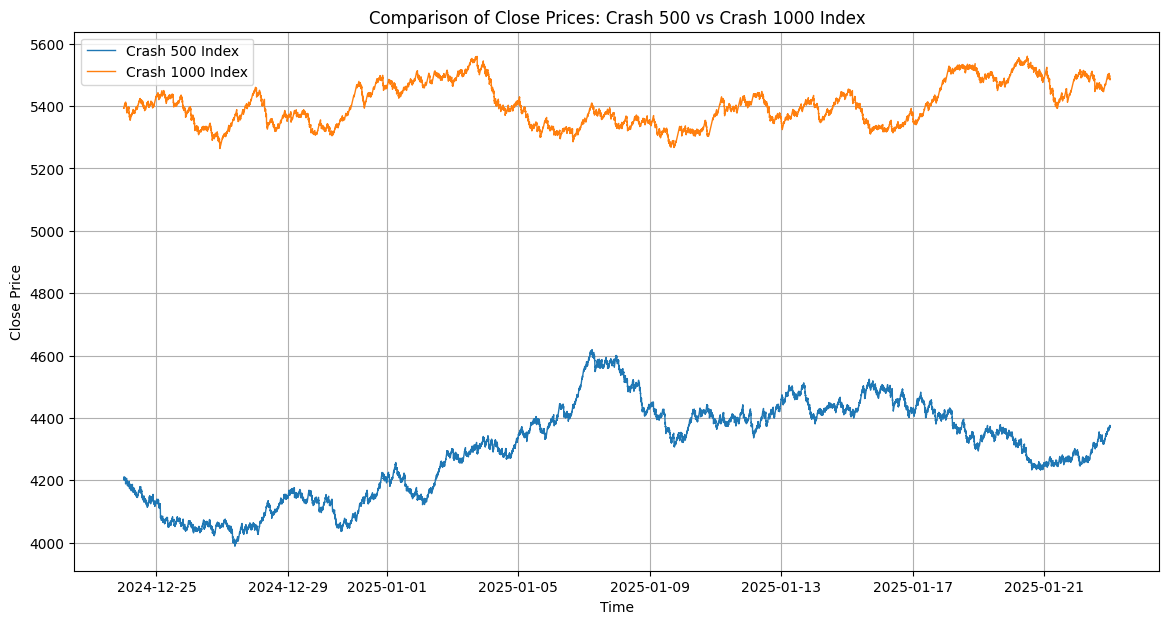

In [6]:
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format for proper alignment
data_500['time'] = pd.to_datetime(data_500['time'])
data_1000['time'] = pd.to_datetime(data_1000['time'])

# Merge the two datasets on the 'time' column
merged_data = pd.merge(data_500[['time', 'close']], data_1000[['time', 'close']], on='time', suffixes=('_500', '_1000'))

# Plot the 'close' prices of both indices
plt.figure(figsize=(14, 7))
plt.plot(merged_data['time'], merged_data['close_500'], label='Crash 500 Index', linewidth=1)
plt.plot(merged_data['time'], merged_data['close_1000'], label='Crash 1000 Index', linewidth=1)
plt.title('Comparison of Close Prices: Crash 500 vs Crash 1000 Index')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


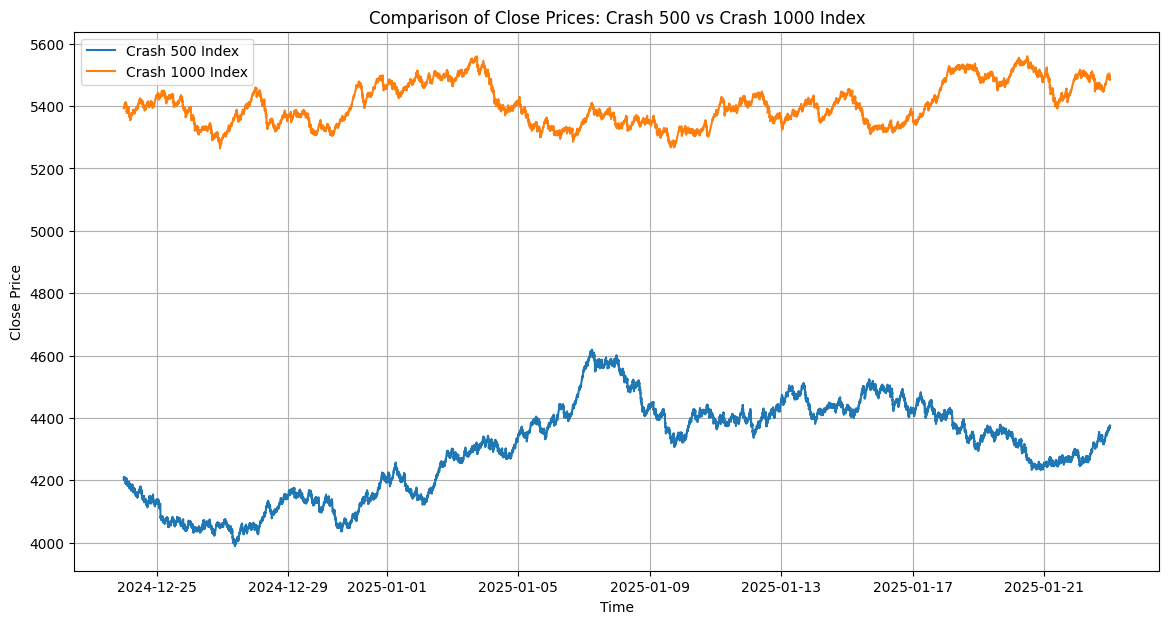

In [7]:
# Ensure data is sorted by time for both datasets
data_500 = data_500.sort_values(by='time').reset_index(drop=True)
data_1000 = data_1000.sort_values(by='time').reset_index(drop=True)

# Merge the datasets again to ensure alignment
merged_data = pd.merge_asof(data_500[['time', 'close']].sort_values('time'),
                            data_1000[['time', 'close']].sort_values('time'),
                            on='time', suffixes=('_500', '_1000'))

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(merged_data['time'], merged_data['close_500'], label='Crash 500 Index', linewidth=1.5)
plt.plot(merged_data['time'], merged_data['close_1000'], label='Crash 1000 Index', linewidth=1.5)
plt.title('Comparison of Close Prices: Crash 500 vs Crash 1000 Index')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


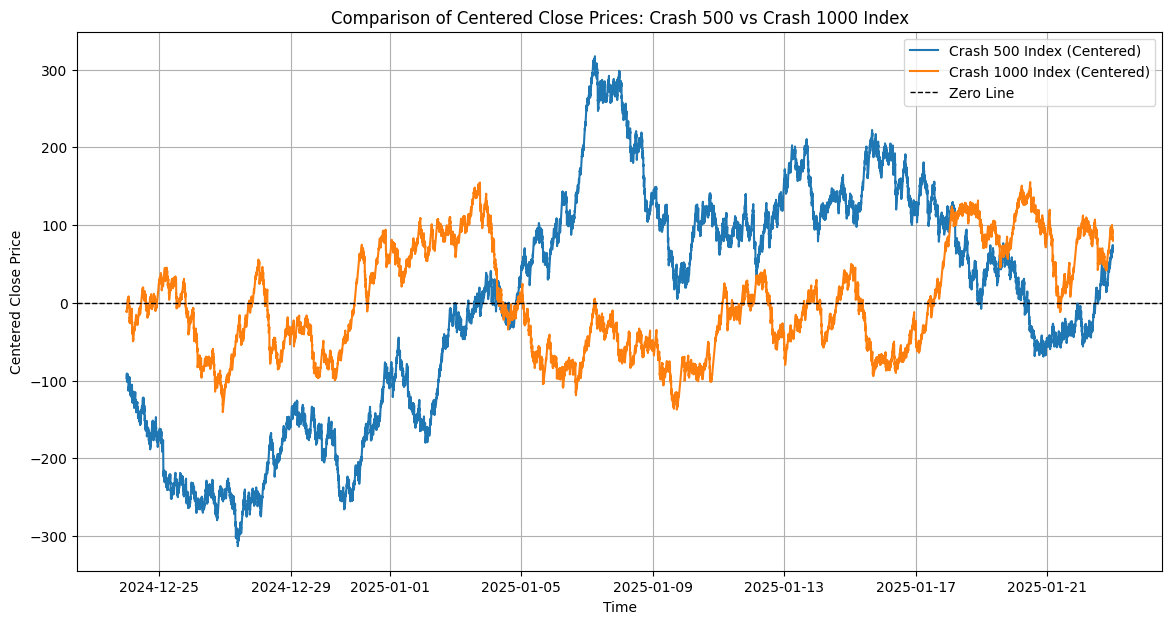

In [8]:
# Center the data around zero by subtracting the mean from each 'close' column
merged_data['close_500_centered'] = merged_data['close_500'] - merged_data['close_500'].mean()
merged_data['close_1000_centered'] = merged_data['close_1000'] - merged_data['close_1000'].mean()

# Plotting the centered data
plt.figure(figsize=(14, 7))
plt.plot(merged_data['time'], merged_data['close_500_centered'], label='Crash 500 Index (Centered)', linewidth=1.5)
plt.plot(merged_data['time'], merged_data['close_1000_centered'], label='Crash 1000 Index (Centered)', linewidth=1.5)
plt.title('Comparison of Centered Close Prices: Crash 500 vs Crash 1000 Index')
plt.axhline(0, color='black', linewidth=1, linestyle='--', label='Zero Line')
plt.xlabel('Time')
plt.ylabel('Centered Close Price')
plt.legend()
plt.grid(True)
plt.show()


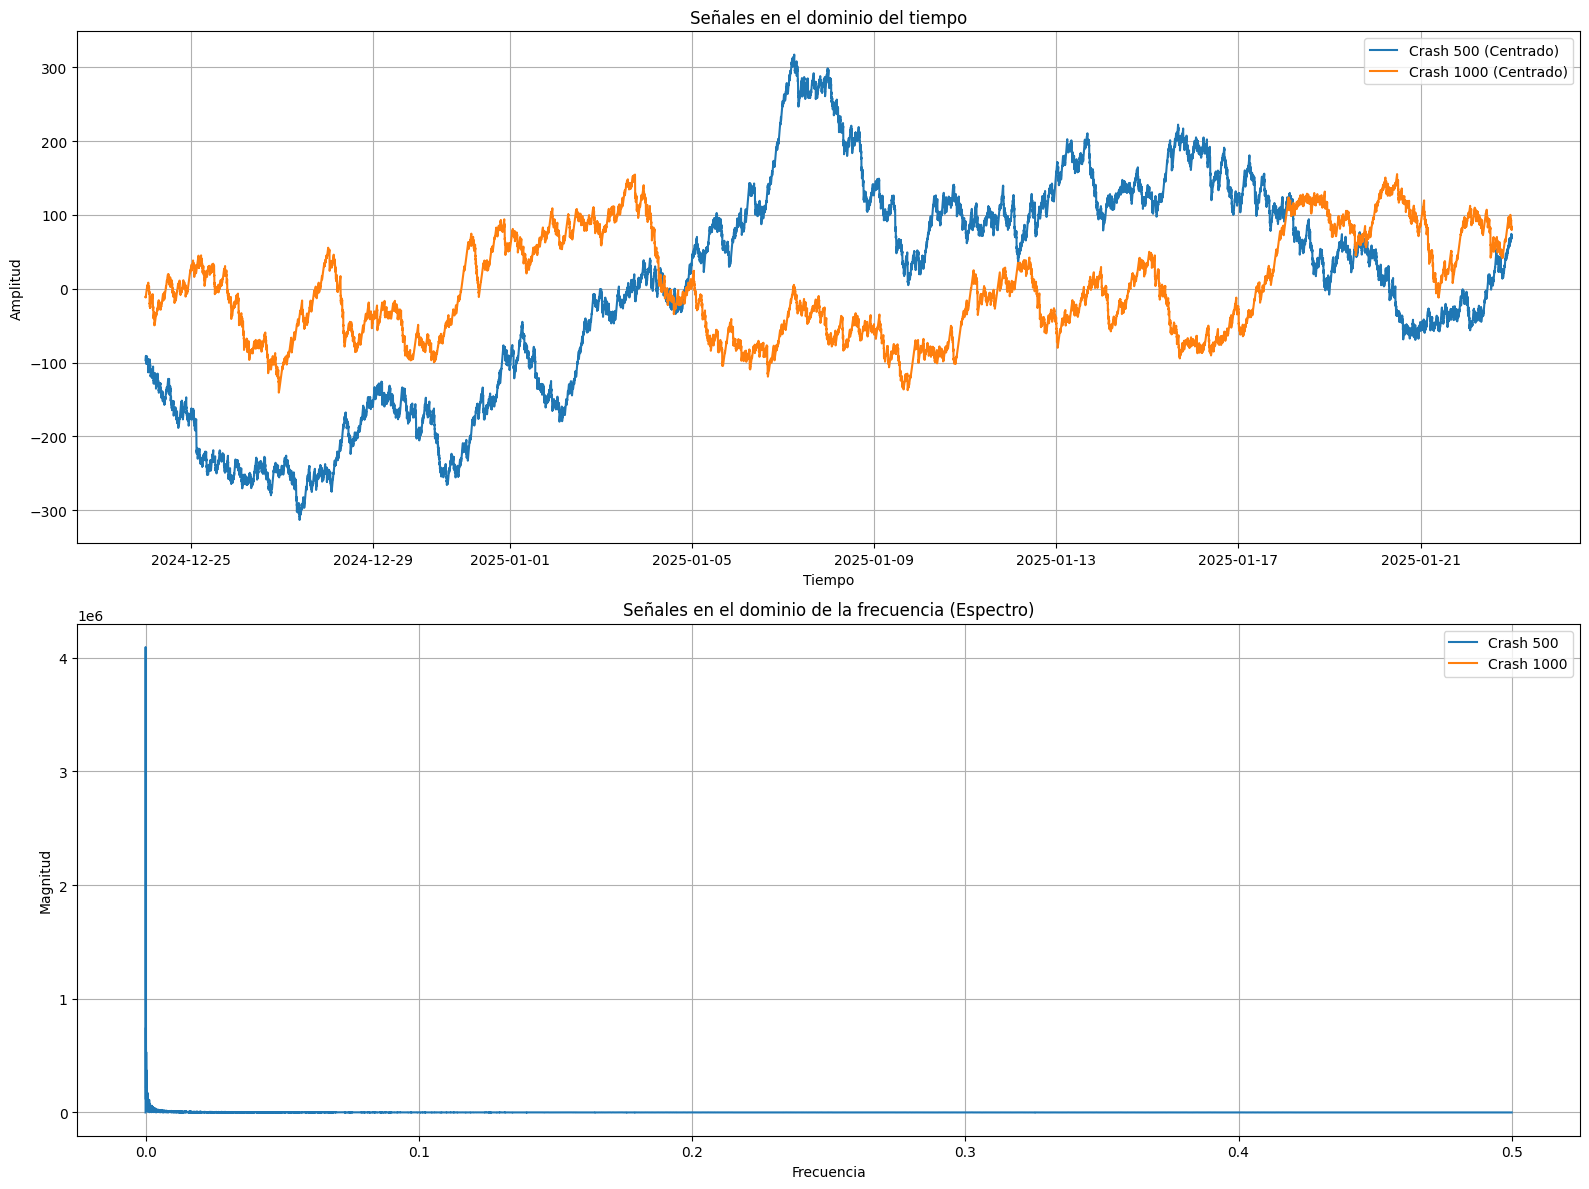

In [13]:
# Análisis espectral en el dominio del tiempo y frecuencia

# FFT para ambos índices
fft_500 = np.fft.fft(merged_data['close_500_centered'])
fft_1000 = np.fft.fft(merged_data['close_1000_centered'])

# Frecuencias asociadas
frequencies = np.fft.fftfreq(len(fft_500), d=1)  # d=1 as default sampling interval

# Magnitudes del espectro
magnitude_500 = np.abs(fft_500)
magnitude_1000 = np.abs(fft_1000)

# Gráficos combinados de dominio del tiempo y espectro
plt.figure(figsize=(16, 12))

# Dominio del tiempo
plt.subplot(2, 1, 1)
plt.title("Señales en el dominio del tiempo")
plt.plot(merged_data['time'], merged_data['close_500_centered'], label="Crash 500 (Centrado)")
plt.plot(merged_data['time'], merged_data['close_1000_centered'], label="Crash 1000 (Centrado)")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Dominio de la frecuencia
plt.subplot(2, 1, 2)
plt.title("Señales en el dominio de la frecuencia (Espectro)")
plt.plot(frequencies[:len(frequencies)//2], magnitude_500[:len(magnitude_500)//2], label="Crash 500")
plt.plot(frequencies[:len(frequencies)//2], magnitude_1000[:len(magnitude_1000)//2], label="Crash 1000")
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
